In [ ]:
!wget https://drive.google.com/drive/folders/1wFX9aUT3bZxEZku-McTENMwYWVszz5iz

--2024-07-16 05:55:28--  https://drive.google.com/drive/folders/1wFX9aUT3bZxEZku-McTENMwYWVszz5iz
Resolving drive.google.com (drive.google.com)... 74.125.23.102, 74.125.23.101, 74.125.23.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/folders/1wFX9aUT3bZxEZku-McTENMwYWVszz5iz&followup=https://drive.google.com/drive/folders/1wFX9aUT3bZxEZku-McTENMwYWVszz5iz [following]
--2024-07-16 05:55:28--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&osid=1&continue=https://drive.google.com/drive/folders/1wFX9aUT3bZxEZku-McTENMwYWVszz5iz&followup=https://drive.google.com/drive/folders/1wFX9aUT3bZxEZku-McTENMwYWVszz5iz
Resolving accounts.google.com (accounts.google.com)... 173.194.174.84, 2404:6800:4008:c06::54
Connecting to accounts.google.com (accounts.goog

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your zip file
zip_path = '/content/drive/MyDrive/My Projects/Flowers recognization/flowers.zip'
extract_path = '/content/flowers'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Verify the extraction
print(f"Files extracted to: {os.listdir(extract_path)}")

Files extracted to: ['flowers']


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/flowers/flowers/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/flowers/flowers/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/flowers/flowers/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 4317 files belonging to 5 classes.
Found 4317 files belonging to 5 classes.
Found 4317 files belonging to 5 classes.


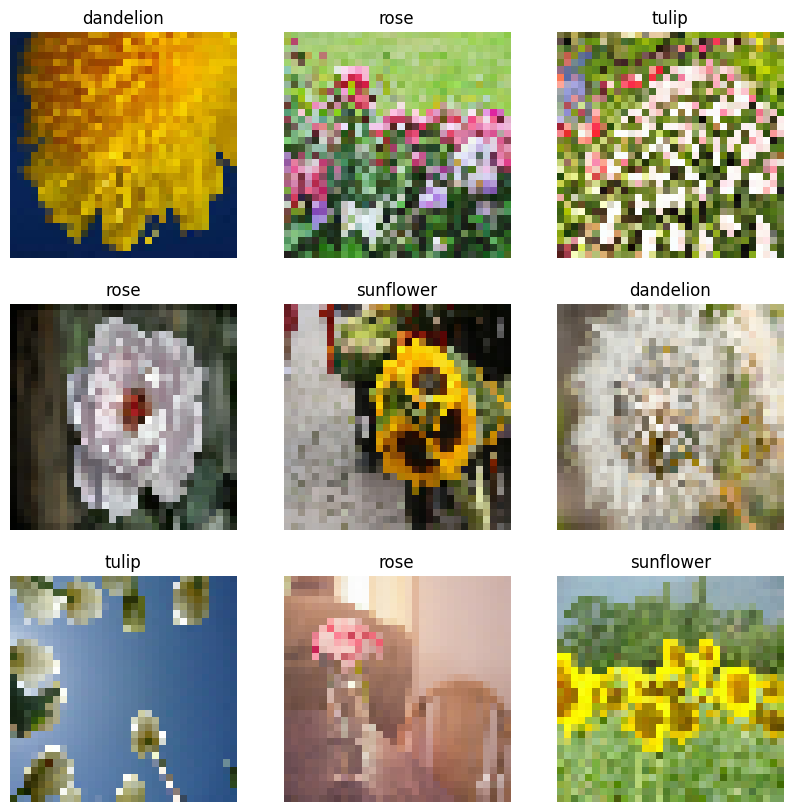

In [ ]:
class_names = ["daisy", "dandelion", "rose", "sunflower", "tulip"]
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(5) # Change the number of units in the final dense layer to 5 to match the number of flower classes
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 15
)

Epoch 1/15
216/216 [==============================] - 16s 70ms/step - loss: 1.3364 - accuracy: 0.4102 - val_loss: 1.2428 - val_accuracy: 0.4399
Epoch 2/15
216/216 [==============================] - 15s 69ms/step - loss: 1.1168 - accuracy: 0.5319 - val_loss: 1.0301 - val_accuracy: 0.5909
Epoch 3/15
216/216 [==============================] - 15s 69ms/step - loss: 1.0123 - accuracy: 0.5930 - val_loss: 0.9224 - val_accuracy: 0.6284
Epoch 4/15
216/216 [==============================] - 15s 69ms/step - loss: 0.9422 - accuracy: 0.6152 - val_loss: 0.8518 - val_accuracy: 0.6646
Epoch 5/15
216/216 [==============================] - 15s 69ms/step - loss: 0.8930 - accuracy: 0.6442 - val_loss: 0.8325 - val_accuracy: 0.6685
Epoch 6/15
216/216 [==============================] - 15s 69ms/step - loss: 0.8267 - accuracy: 0.6648 - val_loss: 0.7495 - val_accuracy: 0.7091
Epoch 7/15
216/216 [==============================] - 15s 69ms/step - loss: 0.7847 - accuracy: 0.6982 - val_loss: 0.7478 - val_accuracy:

In [ ]:
model.evaluate(test_ds)

216/216 [==============================] - 5s 25ms/step - loss: 0.3970 - accuracy: 0.8578


[0.3970091938972473, 0.8577715754508972]

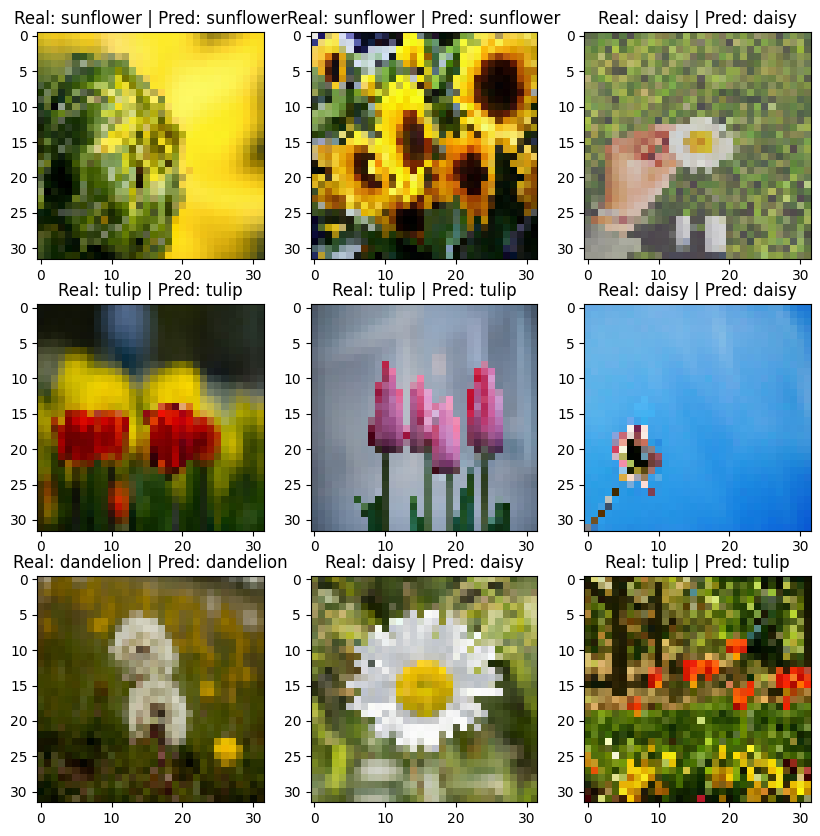

In [44]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
   # plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])
    plt.title("Real: " + class_names[labels[i]] + " | Pred: " + class_names[index])

In [45]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("flo_model.tflite", 'wb') as f:
  f.write(tflite_model)